# Project 03: RNN practice - Movie Reviews

In this project, we would like to understand LSTM by practice. 
<br>To make problem simple and focus on the LSTM module, we choose datasets built-in Keras.


In Keras, there is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). 


Later, if you would like to explore more, another classic dataset [Large Movie Review Dataset v1.0](http://ai.stanford.edu/~amaas/data/sentiment/) is recommended.

## Step 1: Configurations

In [1]:
%matplotlib inline
from imp import reload

import itertools
import numpy as np
import utils; reload(utils)

from utils import *
from __future__ import print_function
from sklearn.metrics import confusion_matrix, classification_report, f1_score

Using TensorFlow backend.


In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

from IPython.display import SVG
from IPython.display import Image

In [3]:
max_features = 20000
embedding_size = 128
lstm_output_size = 128
maxlen = 80
batch_size = 32
epochs = 20

## Step 2: Load and pre-process Dataset

In [4]:
# Load dataset and check the status
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


In [5]:
# Pad sequences (samples x times)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


## Step 3: Build Model and Train

In [6]:
# Build model
model = Sequential()
model.add(Embedding(max_features, embedding_size))
model.add(LSTM(lstm_output_size, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Training
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 156s 6ms/step - loss: 0.4599 - acc: 0.7820 - val_loss: 0.3948 - val_acc: 0.8266
Epoch 2/20
25000/25000 [==============================] - 154s 6ms/step - loss: 0.2986 - acc: 0.8780 - val_loss: 0.3712 - val_acc: 0.8388
Epoch 3/20
25000/25000 [==============================] - 151s 6ms/step - loss: 0.2141 - acc: 0.9166 - val_loss: 0.4216 - val_acc: 0.8260
Epoch 4/20
25000/25000 [==============================] - 149s 6ms/step - loss: 0.1498 - acc: 0.9437 - val_loss: 0.4780 - val_acc: 0.8295
Epoch 5/20
25000/25000 [==============================] - 149s 6ms/step - loss: 0.1073 - acc: 0.9612 - val_loss: 0.5956 - val_acc: 0.8265
Epoch 6/20
25000/25000 [==============================] - 150s 6ms/step - loss: 0.0796 - acc: 0.9728 - val_loss: 0.6693 - val_acc: 0.8230
Epoch 7/20
25000/25000 [==============================] - 149s 6ms/step - loss: 0.0523 - acc: 0.9826 - val_loss: 0.6680 - 

## Step 4: Evaluation and Scores

In [8]:
# Evaluate model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
preds = model.predict_classes(x_test, batch_size=batch_size)

25000/25000 [==============================] - 32s 1ms/step


In [9]:
# Save the model weights
model_path = 'data/imdb/models/'
model.save(model_path + 'lstm_model.h5')
model.save_weights(model_path + 'lstm_weights.h5')

[[10361  2139]
 [ 2699  9801]]


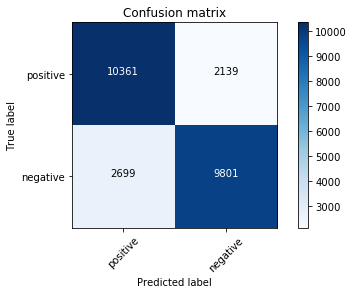

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, {'negative': 0, 'positive': 1})

In [11]:
# F1 score
f1_macro = f1_score(y_test, preds, average='macro') 
f1_micro = f1_score(y_test, preds, average='micro')

print('Test accuracy:', acc)
print('Test score (loss):', score)
print('')
print('F1 Score (Macro):', f1_macro)
print('F1 Score (Micro):', f1_micro)

Test accuracy: 0.80648
Test score (loss): 1.34905840575

F1 Score (Macro): 0.806382850659
F1 Score (Micro): 0.80648


## Step 5: Prediction

In this step, we would like to predict whether the comment is positive. 
<br>The first step is to convert word to id, then predict with model trained.
<br>This part is still under improvement.

In [12]:
# Get the word-id relationship from Keras.imdb
word_to_id = imdb.get_word_index()

# Key in your comments, now only one word is allowed
review = "wonder"

# Data conversion
review_id = word_to_id[review]
r = np.array([review_id])

preds = model.predict_classes(r)
if (preds[0][0]==0):
    print ("positive review.")
elif (preds[0][0]==1):
    print ("negtive review.")
else:
    print ("invalid review.")

positive review.
